In [38]:
# !pip uninstall keras


In [39]:
# !pip install keras

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
Cement =LabelEncoder()
data =pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/concrete.csv")
data.drop("slag",axis=1,inplace=True) #delete column slag with drop command
data["coarseagg"] =data["coarseagg"].fillna(data["coarseagg"].median()) #filling values with medium value to make it average using fillna command
data["fineagg"] =data["fineagg"].fillna(data["fineagg"].median()) #filling values with medium value to make it average using fillna command
data["age"] =data["age"].fillna(data["age"].median()) #filling values with medium value to make it average using fillna command
data["strength"] = data["strength"].map(lambda x: 1 if x > 45 else 0) #make data into Boolean form(True and False)
data.head()

,cement,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,162.0,2.5,1040.0,676.0,28,1
1,540.0,0.0,162.0,2.5,1055.0,676.0,28,1
2,332.5,0.0,228.0,0.0,932.0,594.0,270,0
3,332.5,0.0,228.0,0.0,932.0,594.0,365,0
4,198.6,0.0,192.0,0.0,978.4,825.5,360,0


In [41]:
data.isnull().sum() #check null values

,0
cement,0
ash,0
water,0
superplastic,0
coarseagg,0
fineagg,0
age,0
strength,0


In [42]:
y = data["strength"] #Putting strenght in y axis
x = data.drop("strength",axis=1) #Putting all columns in x axis and dropping strength form x axis

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=1)

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test =scaler.transform(x_test)

In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, GaussianNoise

model = Sequential()

model.add(Dense(units=100, activation="relu", input_dim=x_train.shape[1], kernel_initializer="normal"))
model.add(Dense(units=50, activation="relu", kernel_initializer="normal"))
model.add(Dropout(rate=0.2))
model.add(Dense(units=40, activation="relu", kernel_initializer="normal"))
model.add(Dropout(rate=0.2))
model.add(Dense(units=30, activation="relu", kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Dense(units=20, activation="relu", kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Dense(units=10, activation="relu", kernel_initializer="normal"))
model.add(GaussianNoise(stddev=0.87))  # Corrected spelling of "GaussianNoise"
model.add(BatchNormalization())
model.add(Dense(units=1, activation="sigmoid", kernel_initializer="normal"))
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"]) # Compile the model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
history = model.fit(x_train, y_train, epochs=110, batch_size=40, validation_data=(x_test, y_test), verbose=1)


Epoch 1/110
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.5061 - loss: 0.6928 - val_accuracy: 0.7136 - val_loss: 0.6827
Epoch 2/110
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6062 - loss: 0.6798 - val_accuracy: 0.7136 - val_loss: 0.6735
Epoch 3/110
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6985 - loss: 0.6718 - val_accuracy: 0.7136 - val_loss: 0.6653
Epoch 4/110
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7485 - loss: 0.6540 - val_accuracy: 0.7136 - val_loss: 0.6580
Epoch 5/110
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7638 - loss: 0.6447 - val_accuracy: 0.7136 - val_loss: 0.6515
Epoch 6/110
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7624 - loss: 0.6379 - val_accuracy: 0.7136 - val_loss: 0.6457
Epoch 7/110
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7460 - loss: 0.6354 - val_accuracy: 0.7136 - val_loss: 0.6404
Epoch 8/110
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7527 - loss: 0.6297 - val_accuracy: 0.7136 -

In [50]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

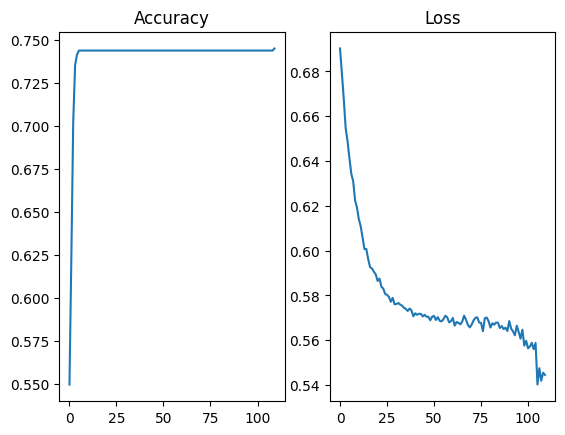

In [52]:
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])  # Access history with 'history.history' with accuracy key
plt.title("Accuracy") #Added plot title
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])  # Access history with 'history.history' with loss key
plt.title("Loss") #Added Plot title
plt.show()

In [53]:
from sklearn.tree import DecisionTreeClassifier
model1 =DecisionTreeClassifier(max_depth =80)
model1.fit(x_train,y_train)
model1.score(x_test,y_test)

0.8786407766990292

In [54]:
from sklearn.svm import SVC
model2 =SVC()
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.8252427184466019